In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./ToN_IoT.zip")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
output = 'type'

In [5]:
df[output].unique()

array(['ransomware', 'ddos', 'injection', 'normal', 'password',
       'backdoor', 'dos', 'xss', 'scanning', 'mitm'], dtype=object)

In [6]:
df[output].value_counts()

type
normal        34955
backdoor      14102
dos           14094
password      14028
ransomware    13993
ddos          13981
injection     13975
xss           13974
scanning      13907
mitm            721
Name: count, dtype: int64

In [7]:
col_1 = ['DDoS']
col_2 = ['DoS', 'Reconnaissance', 'Normal', 'Theft']


In [8]:
df_1 = df[df[output].isin(col_1)] 
df_2 = df[df[output].isin(col_2)]

In [9]:
df_1[output].count(), df_2[output].count()

(0, 0)

In [10]:
df_1[output].value_counts()

Series([], Name: count, dtype: int64)

In [11]:
df_2[output].value_counts()

Series([], Name: count, dtype: int64)

In [12]:
def csv_save_zip(df, filename):
    compression_options = dict(method='zip', archive_name=f'{filename}.csv')
    df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

In [13]:
csv_save_zip(df_1, 'training-set_0')

In [14]:
csv_save_zip(df_2, 'training-set_1')

In [5]:
x = df
y = df[output]
x, _x, y, _y = train_test_split(x, y, random_state=189, test_size=0.20, stratify=y)

In [16]:
x

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
48105,192.168.1.32,44570,18.194.169.124,80,tcp,-,0.000000,0,0,SH,...,0,0,-,-,-,-,-,-,1,xss
95102,192.168.1.193,49160,192.168.1.33,7870,tcp,-,0.000000,0,0,OTH,...,0,0,-,-,-,-,-,-,1,ransomware
47036,192.168.1.193,49283,192.168.1.37,8080,tcp,-,0.000159,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
26626,192.168.1.30,50788,192.168.1.195,80,tcp,http,0.014068,155,978,SF,...,0,0,-,-,-,-,-,-,1,password
141051,192.168.1.30,41101,192.168.1.1,53,udp,dns,0.002099,58,58,SF,...,0,0,-,-,-,-,-,-,1,ddos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118709,192.168.1.31,44872,192.168.1.152,80,tcp,http,0.002957,147,3440,SF,...,0,0,-,-,-,-,-,-,1,password
92142,192.168.1.180,41009,192.168.1.190,53,udp,dns,0.000643,41,89,SF,...,0,0,-,-,-,-,-,-,0,normal
92301,192.168.1.33,43573,192.168.1.193,445,tcp,smb,0.036913,4205,0,RSTR,...,0,0,-,-,-,-,-,-,1,backdoor
145507,192.168.1.31,34860,192.168.1.184,443,tcp,-,60.411087,0,0,SHR,...,0,0,-,-,-,-,-,-,1,ddos


In [17]:
_x

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
69037,192.168.1.152,37214,192.168.1.190,53,udp,dns,0.000020,130,0,S0,...,0,0,-,-,-,-,-,-,0,normal
18278,192.168.1.30,54,192.168.1.193,54,tcp,-,0.009250,0,0,REJ,...,0,0,-,-,-,-,-,-,1,dos
58278,192.168.1.152,57319,192.168.1.190,53,udp,dns,0.000056,130,0,S0,...,0,0,-,-,-,-,-,-,0,normal
123767,172.17.0.5,47635,192.168.1.190,53,udp,dns,0.001241,0,178,SHR,...,0,0,-,-,-,-,-,-,0,normal
91228,192.168.1.190,64009,203.119.86.101,53,udp,dns,8.074840,101,772,SF,...,0,0,-,-,-,-,-,-,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36030,192.168.1.32,53033,192.168.1.103,1040,tcp,-,0.000000,0,0,S0,...,0,0,-,-,-,-,-,-,1,scanning
40157,192.168.1.193,49241,192.168.1.37,8080,tcp,-,0.000099,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
7574,192.168.1.193,49851,192.168.1.37,8080,tcp,-,0.000164,0,0,REJ,...,0,0,-,-,-,-,-,-,1,backdoor
138646,192.168.1.30,54192,192.168.1.152,80,tcp,http,0.275688,267,3440,SF,...,0,0,-,-,-,-,-,-,1,injection


In [18]:
csv_save_zip(x, 'training-set_0')

In [19]:
csv_save_zip(_x, 'training-set_1')

In [12]:
x['type'].value_counts()

NameError: name 'x' is not defined

In [14]:
values = df[output].value_counts()

for key, count in values.items():
    df_key = df[df[output] == key]
    
    

In [1]:
import psutil
import time
import matplotlib.pyplot as plt
from threading import Thread, Event
import numpy as np

In [11]:
def monitor_resources(interval_sec, cpu_usage, ram_usage, stop_event):
    while not stop_event.is_set():
        ram_amount = round(psutil.virtual_memory().used / (1024 ** 2))
        cpu_percent = psutil.cpu_percent(interval=interval_sec)
        cpu_usage.append(cpu_percent)
        ram_usage.append(ram_amount)
        
def record_performance(interval_sec=1):
    cpu_usage = []
    ram_usage = []
    stop_event = Event()
    worker = Thread(target=monitor_resources, args=(interval_sec, cpu_usage, ram_usage, stop_event), daemon=True)
    worker.start()

    def get_result():
        stop_event.set()
        worker.join()
        return cpu_usage, ram_usage, interval_sec

    return get_result

In [14]:
def plot_performance_report(record, path):
    global ram_usage,cpu_usage
    cpu_usage, ram_usage, record_interval = record()

    length = len(cpu_usage)

    min = len(cpu_usage) * record_interval // 60
    # Rescale data to fit within 1000-2000 points
    interval = max(1, length // 1000)  # Adjusted interval for CPU usage
    cpu_usage = cpu_usage[::interval]
    ram_usage = ram_usage[::interval]

    time_intervals = np.arange(0,length,interval)*record_interval/60

    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time_intervals, cpu_usage)
    plt.ylim(0, 100)
    plt.xticks(np.arange(0, min, 1.0))
    plt.title('CPU Usage Over Time')
    plt.grid(True)
    plt.ylabel('Usage (%)')
    plt.xticks(rotation=45)

    print(min, np.arange(0,min,1))

    plt.subplot(2, 1, 2)
    plt.plot(time_intervals, ram_usage, color='orange')
    plt.xticks(np.arange(0, min, 1.0))
    plt.title('RAM Usage Over Time')
    plt.grid(True)
    plt.ylabel('Usage (MB)')
    plt.xticks(rotation=45)

    plt.xlabel('Time')
    plt.tight_layout()
    plt.savefig(path, dpi=300)
    plt.show()


3.0 [0. 1. 2.]


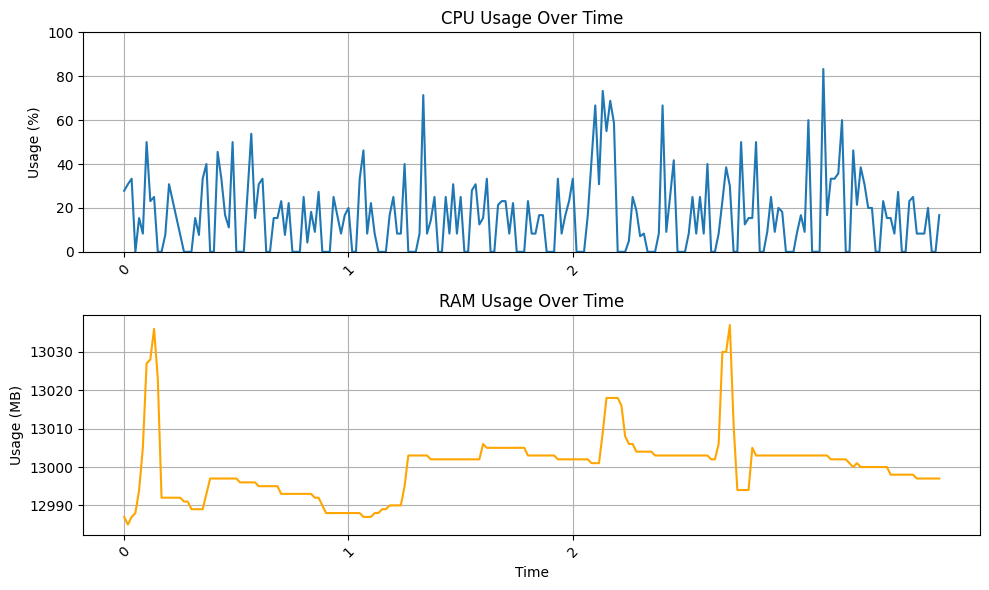

: 

In [15]:
cpu_usage = []
ram_usage = []
record = record_performance()
time.sleep(3)
plot_performance_report(record, 'performance.png')


In [28]:
cpu_usage

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 42.9,
 0.0,
 0.0,
 0.0,
 25.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 25.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 20.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 40.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 60.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 25.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 7.7,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 57.1,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 37.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 44.4,
 0.0,
 0.0,
 0.0,
 25.0,

In [6]:
from ctgan import CTGAN
ctgan = CTGAN(verbose=True, epochs=50)

In [7]:
train_data = _x

In [8]:
ctgan_data = train_data[1:1]
for val in train_data['type'].unique():
    val_data = train_data[train_data['type'] == val].drop_duplicates()
    if len(val_data) > 100:
        val_data = val_data.sample(n=100, random_state=42)
    ctgan_data = pd.concat([ctgan_data, val_data])

In [10]:
ctgan.fit(ctgan_data, ctgan_data.columns)


Gen. (0.17) | Discrim. (0.56): 100%|██████████| 50/50 [00:09<00:00,  5.47it/s] 


In [26]:
ctgan.sample(n=100)[]

,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,conn_state,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
0,fe80::601f:9cde:4832:2f3f,47110,192.168.1.195,1812,tcp,-,0.000000,0,1951,SF,...,0,0,-,-,-,-,-,-,1,xss
1,192.168.1.193,49348,192.168.1.33,36,tcp,dns,0.821381,0,0,SF,...,0,0,-,-,-,-,-,-,1,xss
2,192.168.1.32,35,192.168.1.190,53,tcp,http,0.015054,504,0,SF,...,0,0,-,-,-,-,-,-,1,ddos
3,192.168.1.30,49644,192.168.1.193,80,tcp,-,0.000000,0,2924,REJ,...,0,0,-,-,-,-,-,-,1,password
4,192.168.1.31,36240,172.217.167.68,8002,tcp,http,0.005628,0,1341,SF,...,0,0,-,-,-,-,-,-,1,mitm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,192.168.1.31,34634,192.168.1.195,80,tcp,dns,0.001390,2214,0,SF,...,0,0,-,-,-,-,-,-,1,scanning
96,192.168.1.30,54728,192.168.1.193,123,tcp,-,0.047484,0,0,S1,...,0,0,-,-,-,-,-,-,0,password
97,192.168.1.152,80,192.168.1.190,80,tcp,-,0.002483,263,3642,SHR,...,0,0,-,-,-,-,-,-,1,ddos
98,172.17.0.5,53921,192.168.1.152,80,tcp,dns,0.000000,0,0,SF,...,0,0,-,-,-,-,-,-,1,mitm
